                                 Investigating movies data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This report will analysis the tmdb-movies dataset,the dataset includes some data of differnet kind of movies including their genres ,directors, actors, production companies and the pudgets and revenue they achived ,some questions have been raised by viewing this data set :     
1- Are some genres usually achieve income more than others??
2- What are the most successful  production companies which achieved  more revenue than the others?
3-How are revenues trending over time?


In [94]:
import pandas as pd
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
The data exists in a CSV file I loaded it in a dataframe to be able to deal with it and explore it 


In [95]:
#Loading the data from the csv file ,taking into consideration to neglect the  extra" in some values
df = pd.read_csv('tmdb-movies.csv',error_bad_lines=False ,sep=',',comment='"')
#df.head()
#df.info()
#I refrenced to these websites:
#
#https://stackoverflow.com
#https://www.geeksforgeeks.org
#https://note.nkmk.me/en/python-pandas-dataframe-rename/



### Data Cleaning 

In [96]:
# As I am going to analyze the relation between genres,production_companies  and revenue then it doesn't make any sense to have missing values in these columns so i will delete them ,as they cannot be assumed 
df = df.dropna(subset=['revenue','production_companies','genres','release_year'])
df.info()
#df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1613
Data columns (total 21 columns):
id                       1426 non-null object
imdb_id                  1425 non-null object
popularity               1426 non-null object
budget                   1426 non-null object
revenue                  1426 non-null float64
original_title           1426 non-null object
cast                     1422 non-null object
homepage                 344 non-null object
director                 1424 non-null object
tagline                  1031 non-null object
keywords                 1233 non-null object
overview                 1425 non-null object
runtime                  1426 non-null float64
genres                   1426 non-null object
production_companies     1426 non-null object
release_date             1426 non-null object
vote_count               1426 non-null float64
vote_average             1426 non-null float64
release_year             1426 non-null float64
budget_adj     

In [97]:

##to separate genres ,I have to split the genres as there are multiple values included in each cell and I want to analyze each genre individualy.
df2 = df.genres.str.split('|').apply(pd.Series)
df2.index = df.set_index(['genres', 'revenue']).index
df2.stack().reset_index(['genres', 'revenue'])
df3=df2.stack().reset_index(['genres', 'revenue'])
df3.columns = ['genres', 'revenue', 'genre']


In [98]:
#  To check there isn't any missed genres after splitting the values, I will check whether there is any "space" in the column of genre and display all of them
def checkmissed(obj):
    if obj == ' ':
        return 'missed'
    else:
        return obj
print (df3['genre'].apply(checkmissed).unique())

['Adventure' 'Science Fiction' 'Thriller' 'Action' 'Crime' 'Comedy' 'Drama'
 'Mystery' 'Western' 'Animation' 'Family' 'Fantasy' 'War' 'Romance'
 'Horror' 'History' 'Music' 'Documentary' 'TV Movie' 'Foreign']


In [99]:
#Split production companies
df5 = df.production_companies.str.split('|').apply(pd.Series)
df5.index = df.set_index(['production_companies', 'revenue']).index
df5.stack().reset_index(['production_companies', 'revenue'])
df6=df5.stack().reset_index(['production_companies', 'revenue'])
df6.columns = ['production_companies', 'revenue', 'production_company']


After loading the data I had to do some changes in order to be able to explore it :
1- Replacing the extra " with spaces.
2- dropping rows with null "genres","revenue" or "production companies" values .
3- I had to split the genres in the genres column to be able to explore the relation between each genre and the revenue.
4- I had to split the production companies in the production company column to explore the revenue achived by each company.

<a id='eda'></a>

###Let us try to answer the previous questions :
1- Are some genres usually achieve income more than others?

It will be useful to take a closer look at the movies and to figure out their distribution among different genres

Drama              674
Comedy             470
Thriller           467
Action             271
Horror             254
Crime              215
Romance            202
Adventure          156
Mystery            148
Science Fiction    131
Family             116
Fantasy             91
Animation           68
Documentary         47
Music               43
History             39
War                 34
Western             20
TV Movie            19
Foreign             16
Name: genre, dtype: int64


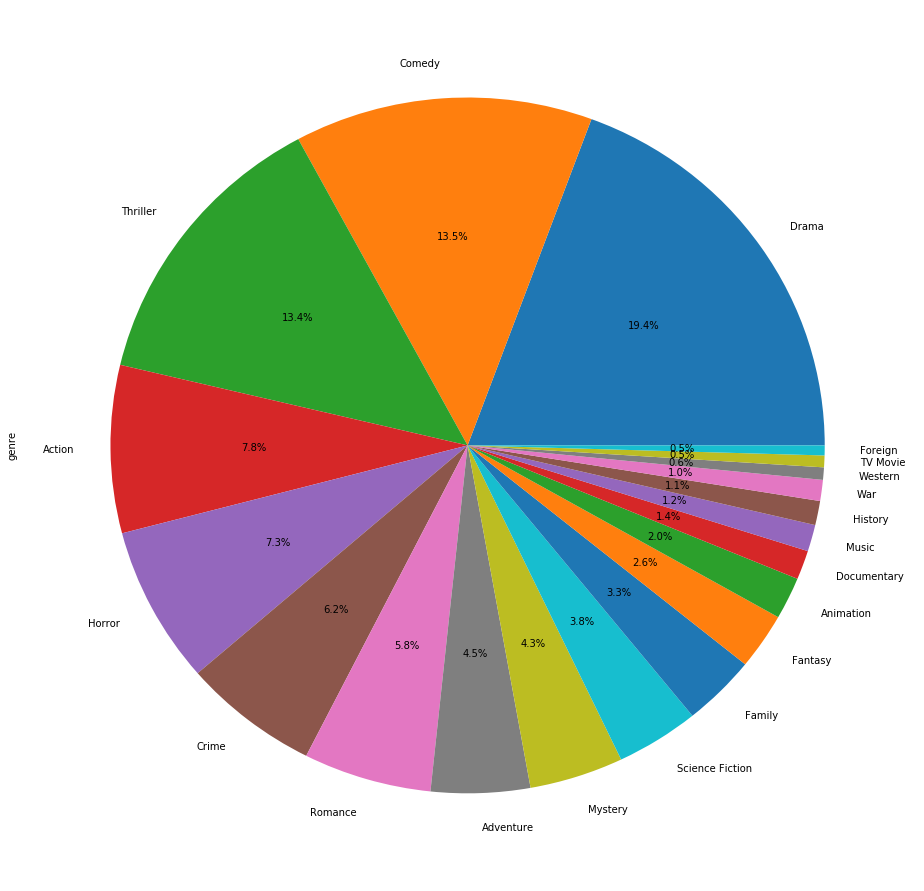

In [100]:
df3['genre'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(16,16))
print(df3['genre'].value_counts())

As it was shown most of the movies had the drama genre about 674 movies on the other hand the least existed genre was foreign ,only 16 movies.

Let us now try to answer the first question about the relation between different genres and revenue

genre
Action             1.131798e+10
Adventure          1.107686e+10
Animation          5.594105e+09
Comedy             1.593112e+10
Crime              6.901180e+09
Documentary        1.681719e+08
Drama              1.707311e+10
Family             8.381443e+09
Fantasy            4.722607e+09
Foreign            7.438031e+06
History            8.468728e+08
Horror             2.780783e+09
Music              7.477009e+08
Mystery            3.376647e+09
Romance            6.262551e+09
Science Fiction    5.537317e+09
TV Movie           4.200000e+07
Thriller           1.482607e+10
War                6.528781e+08
Western            4.156484e+08
Name: revenue, dtype: float64


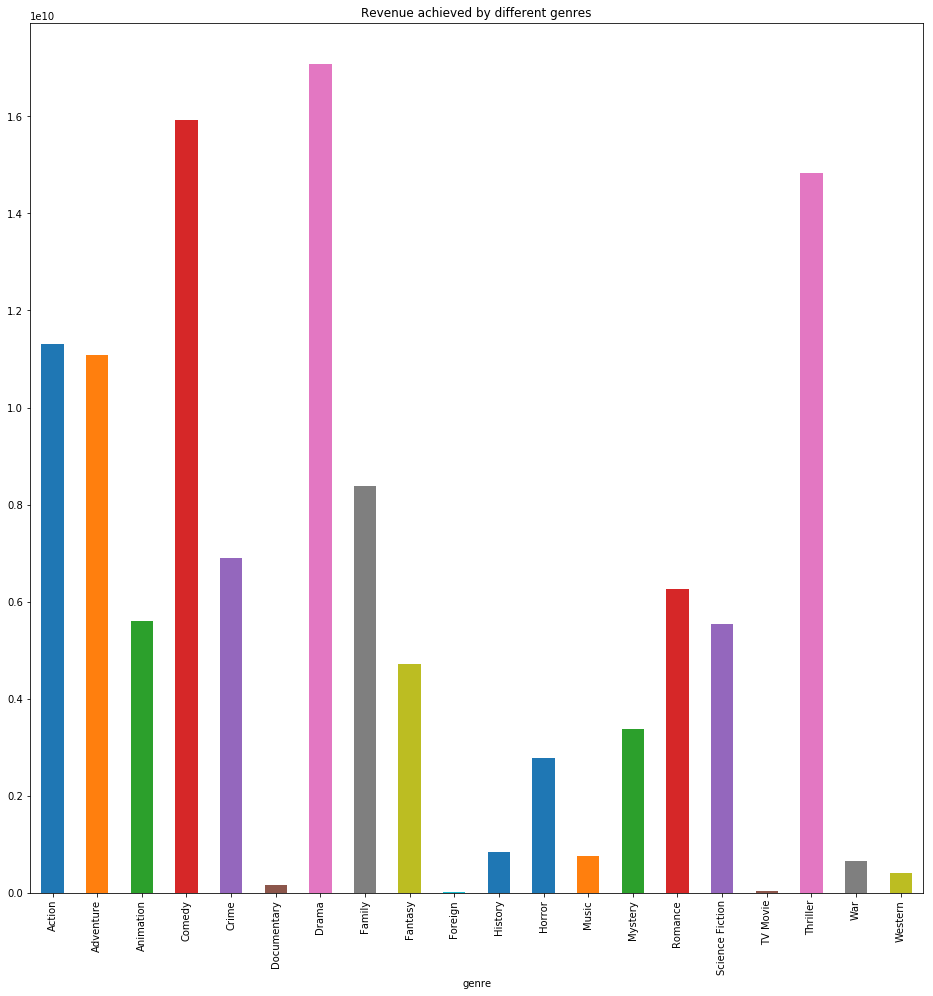

In [101]:
#df3.info()
#df3.head()
print (df3.groupby(['genre'])['revenue'].agg('sum'))
df3.groupby (['genre'])['revenue'].agg('sum').plot(kind='bar',figsize=(16,16),title=('Revenue achieved by different genres'))


From the dataset it looks like  that drama movies has the greatest revenue then the comedy while the least revenue achieved by TV movies

### 2- What are the most successful  production companies which achieved  more revenue than the others?

                                 revenue
production_company                      
Amblin Entertainment        7.929106e+08
Dentsu                      1.506249e+09
Illumination Entertainment  9.707619e+08
Media Rights Capital        1.506249e+09
One Race Films              1.506249e+09
Original Film               1.506249e+09
Universal Pictures          3.269922e+09
Walt Disney Pictures        7.882418e+08


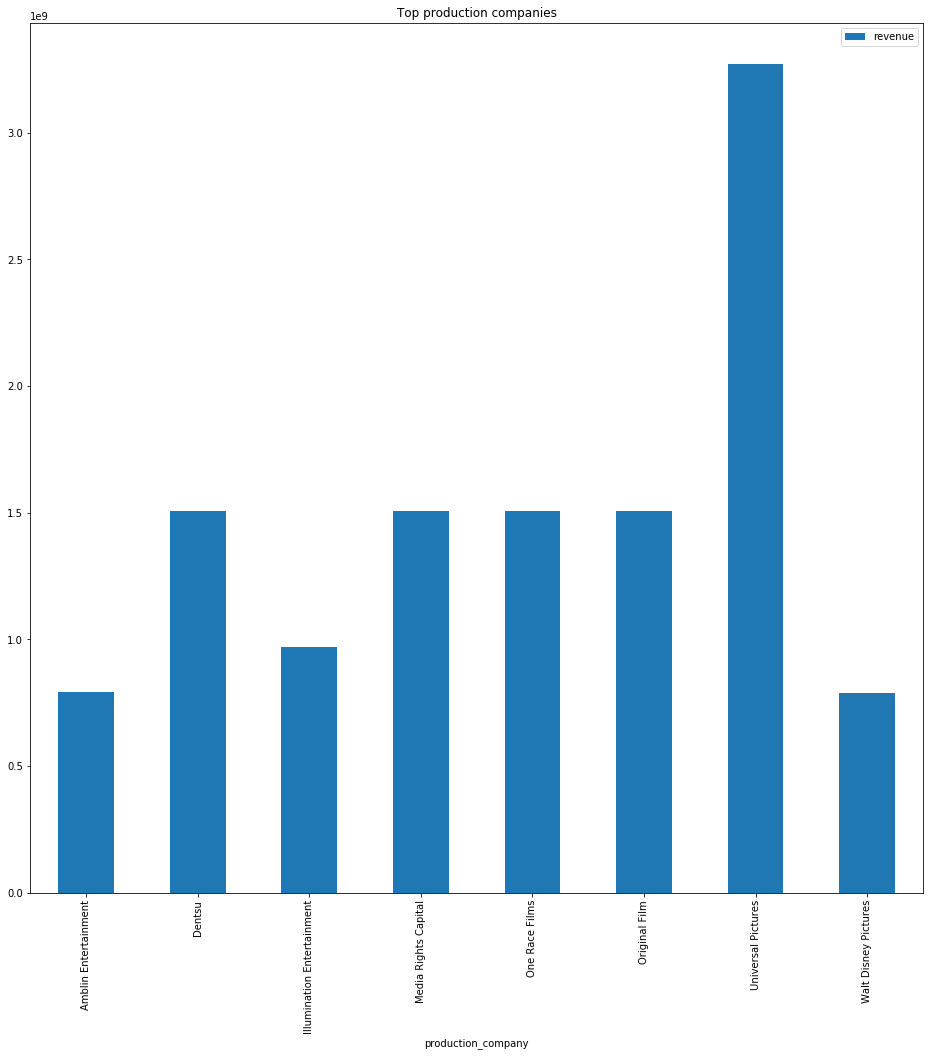

In [102]:

#Display the top 10 revenue achived by  companies
print (df6.nlargest(10, 'revenue').groupby(['production_company']).agg({'revenue': 'sum'}))
df6.nlargest(10, 'revenue').groupby(['production_company']).agg({'revenue': 'sum'}).plot(kind='bar',figsize=(16,16),title=('Top production companies'))



Well it looked that Universal Pictures company had  the best revenue among the compaines including in the data set .

### 3- How are revenues trending over time?


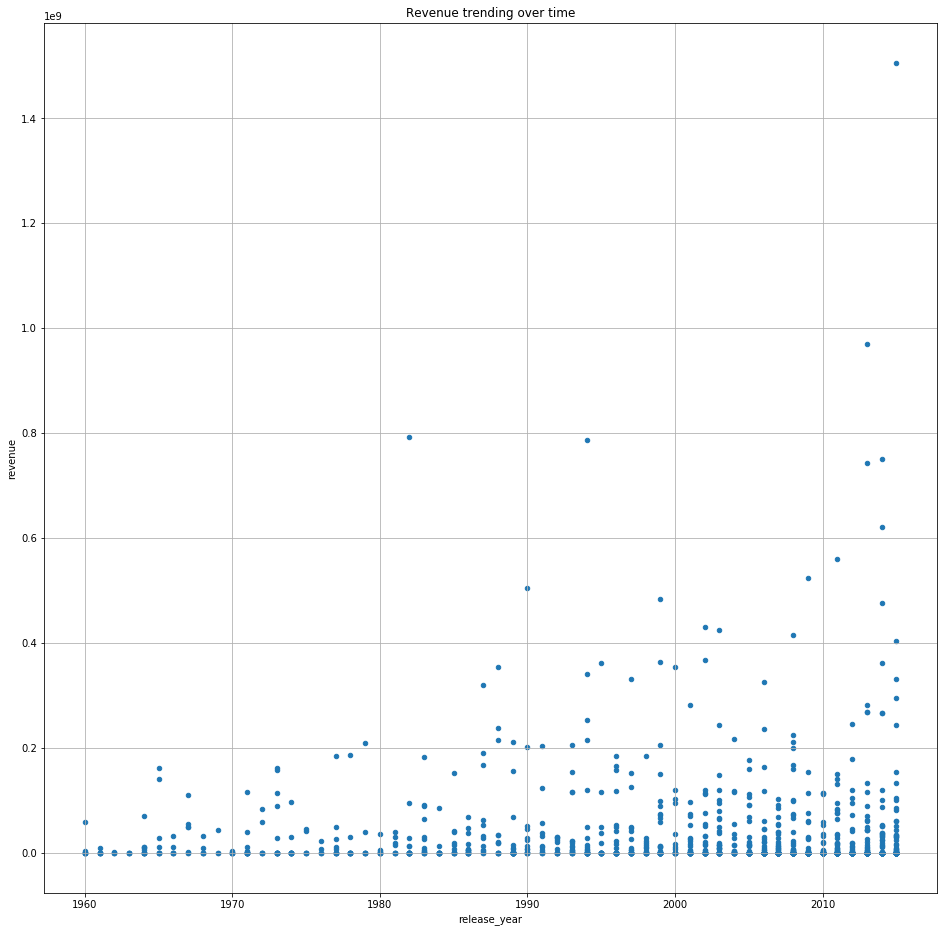

In [103]:
df.plot(y='revenue',x='release_year',kind='scatter',figsize=(16,16),title=('Revenue trending over time'),grid=(True));

It looks like that the revenue ahivied from the movies increases by time .

<a id='conclusions'></a>
## Conclusions
   After exploring these data it shows clearly that most of the movies had the genres of drama also most of the revenue achieved through the drama movies , obviously the TV movies hadn't that luck ! Also the most successful company was the Universal Pictures, Also the data shows that there is increase in the revenue across time.

## Limitations
    I had to drop missed data of revenue ,genres and production companies as there wasn't any way to assume them so these missed data could affect the result of the analysis.

In [104]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0